# OSKM States

Colour cells by combination of OKSM expressed in the cells.

Inputs:
1. Seurat RNA object

In [2]:
library(Seurat)
library(ggplot2)
library(reshape2)
library(patchwork)
library(scattermore)

## Load Inputs
### Seurat Object

In [3]:
rna = readRDS("../../analysis/20200828_RNA_Seurat/sessions/20210725_n59378/seurat.rds")
rna$tech = "rna"

## Plotting

In [4]:
oskm_expr = as.matrix(rna@assays$RNA[c("POU5F1", "SOX2", "KLF4", "MYC")])
head(oskm_expr)

,AAACCCAAGAGTGACC-1,AAACCCAAGTGCCAGA-1,AAACCCACACCATTCC-1,AAACCCACACGCGTCA-1,AAACCCAGTCCATAGT-1,AAACCCAGTTATTCTC-1,AAACCCAGTTGTAGCT-1,AAACCCATCAGACATC-1,AAACCCATCCGTAGGC-1,AAACCCATCGTTAGAC-1,⋯,TTTGATCAGTCAGGGT-9,TTTGATCGTCGCACAC-9,TTTGGAGAGCTCGTGC-9,TTTGGAGTCGACTCCT-9,TTTGGAGTCTATGTGG-9,TTTGGTTCACATCCCT-9,TTTGGTTGTTGCCTAA-9,TTTGGTTTCTCTTAAC-9,TTTGTTGGTAGTGTGG-9,TTTGTTGTCCGTAGTA-9
POU5F1,0.0000000,0.000000,0.0000000,0.0000000,0,0.0000000,0.0000000,0.0000000,0,0,⋯,2.8904576,2.9563295,2.708050,3.006748,2.8975573,1.734546,2.8409436,3.279988,2.939856,3.2507295
SOX2,0.0000000,0.000000,0.0000000,0.0000000,0,0.0000000,0.0000000,0.0000000,0,0,⋯,1.4088359,0.7137133,1.609438,2.361869,1.5699949,1.734546,1.7543741,2.196372,1.700791,1.7528441
KLF4,0.5478637,0.000000,0.5261623,0.7583202,0,0.0000000,0.0000000,0.0000000,0,0,⋯,0.5725588,0.0000000,0.000000,0.000000,0.0000000,0.000000,0.0000000,0.000000,0.000000,0.0000000
MYC,0.0000000,0.964161,0.5261623,0.0000000,0,0.5299292,0.5444695,0.6043609,0,0,⋯,1.5818586,0.0000000,0.000000,0.000000,0.8192839,0.000000,0.7861626,0.000000,0.000000,0.3900802


In [5]:
plot_dimred <- function(x, y, col, dimred="UMAP", subset=NULL, sz=0.5) {
    plot_df <- data.frame(x=x, y=y,
                 cluster=col)
    plot_df = plot_df[sample(dim(plot_df)[1]), ]
    
    if (!is.null(subset)) {
        plot_df = plot_df[plot_df$cluster==subset, ]
    }
    
    ggplot(plot_df) +
    geom_scattermore(aes(x=x, y=y, col=cluster), pointsize = 6, pixels = c(3000,3000)) +
    theme_classic() +
    xlab(sprintf("%s 1", dimred)) + ylab(sprintf("%s 2", dimred)) +
    theme(plot.title = element_text(hjust = 0.5),
          text = element_text(size=12),
          axis.line=element_blank(),
          axis.text.x=element_blank(),
          axis.text.y=element_blank(),
          axis.ticks=element_blank(),
          panel.border = element_rect(colour = "black", fill=NA, size=0.5)) +
    guides(colour = guide_legend(title="Day",
         override.aes = list(shape=16, alpha=1, size=4)))
}

## Clustering Based

In [6]:
library(ClusterR)

Loading required package: gtools



In [7]:
dim(oskm_expr)

[1]     4 59378

In [8]:
NUM_PEAK_SETS = 8
km_mb = MiniBatchKmeans(t(oskm_expr), 
                        batch_size = 1000,
                        clusters = NUM_PEAK_SETS,
                        num_init = 50, 
                        verbose = FALSE)

In [9]:
pr_mb = predict_MBatchKMeans(t(oskm_expr), km_mb$centroids)

In [10]:
# sort centroids by average expr and renumber
pr_mb = order(order(rowSums(km_mb$centroids)))[pr_mb]

In [11]:
sort(table(pr_mb))

pr_mb
    8     5     7     3     2     6     4     1 
  563  1329  4475  6682  7273 10234 10423 18399 

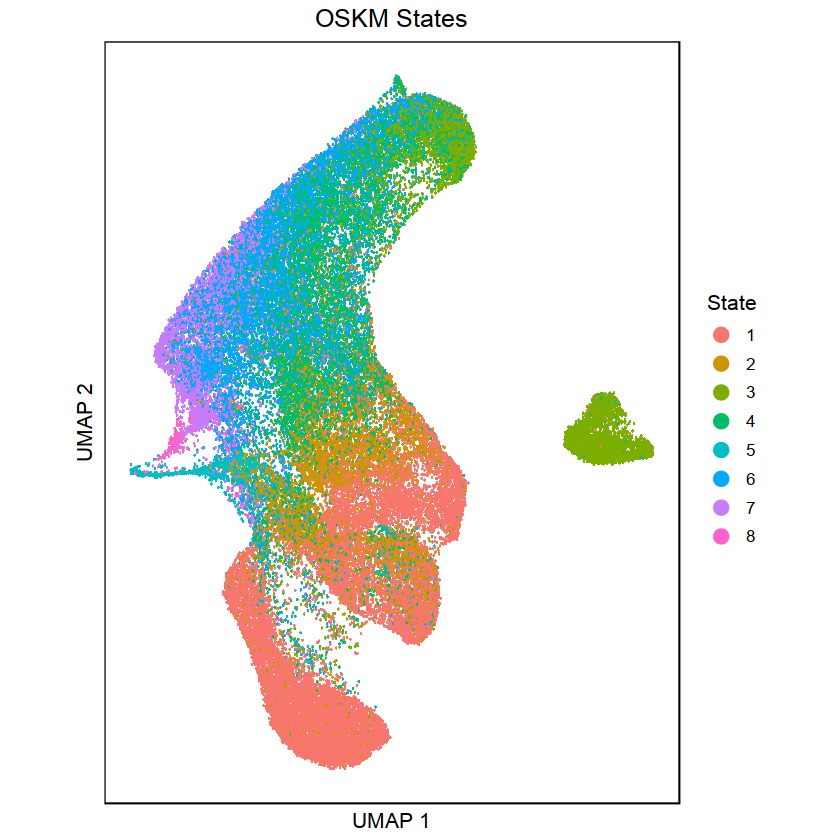

In [12]:
options(repr.plot.width = 7, repr.plot.height = 7)

state_plot <- plot_dimred(data.frame(Embeddings(rna, reduction='umap'))$UMAP_1,
            data.frame(Embeddings(rna, reduction='umap'))$UMAP_2,
            factor(pr_mb),
           sz=.5) +# + scale_color_manual(values=cols) +
guides(color=guide_legend(title="State",
                         override.aes = list(shape=16, alpha=1, size=4))) +
ggtitle("OSKM States") +
coord_fixed() 

state_plot

In [13]:
km_mb$centroids[order(rowSums(km_mb$centroids)), ]

0.09711971,0.02945641,0.1331986,0.1839039
0.40454139,0.18538645,0.3914948,1.9169868
2.71616198,1.06471513,0.2635766,0.5056120
1.87336336,0.61161125,0.5767462,1.9173226
0.88380913,0.43660444,3.2176360,2.1692342
2.58699609,1.36087930,1.5148063,2.2798800
3.52894524,2.48933834,2.5219564,2.7630954
6.26896464,5.07557548,5.6231202,0.9885207


In [14]:
LABELS = c("None", 
           "Mid M",
           "Mid OS",
           "Mid OM",
           "High KM", 
           "Mid OSKM", 
           "High OSKM", 
           "Very high OSK")

COLORS = c("#6f1000", 
           "#fdc086",
           "#29C460",
           "#5762D5",
           "#00A7E1",
           "black",
           "cadetblue2",
           "#f0027f"
          )

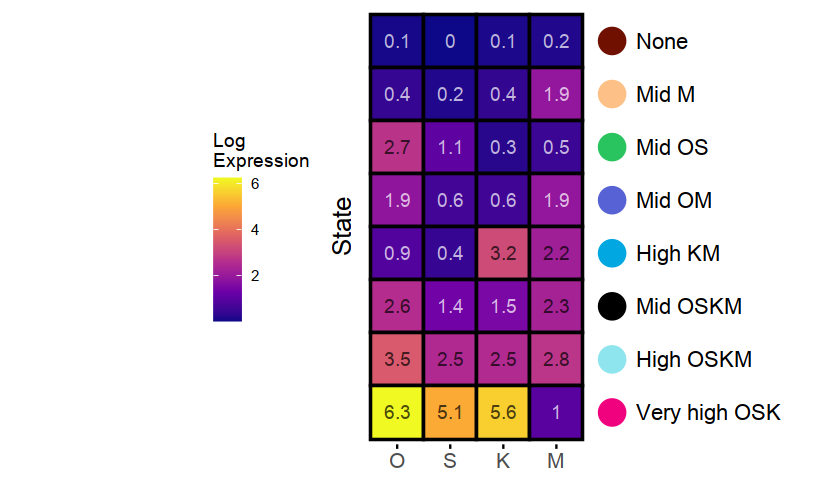

In [15]:
options(repr.plot.width = 7, repr.plot.height = 4)

centroids = km_mb$centroids
centroids = centroids[order(rowSums(centroids)), ]
colnames(centroids) = c("O", "S", "K", "M")
centroids = melt(centroids)
centroids$Var1 = factor(centroids$Var1, levels=rev(seq(NUM_PEAK_SETS)))
centroids$rounded = round(centroids$value, digits=1)

legend_plot <- ggplot(centroids) +
geom_tile(aes(x=Var2, 
              y=Var1, 
              fill=value),
         col="black", size=.75) +
scale_fill_viridis_c(option = "C", name="Log\nExpression") +

geom_text(aes(x=Var2, y=Var1, label=rounded, colour=(rounded>2)), alpha=.7) +
scale_colour_manual(values = c("white", "black")) +

xlab(NULL) + 
ylab("State") +
theme_minimal() +
coord_fixed(clip="off") +
guides(colour=FALSE) +
theme(axis.ticks.x = element_line(colour = "black"),
     axis.text=element_text(size=12),
     axis.text.y = element_blank(),
     axis.title=element_text(size=15),
     legend.position="left",
     panel.grid.major = element_blank())

for (i in seq(length(LABELS))) {
    legend_plot <- legend_plot + annotate(geom = "point", 
                                          x = 5.05, y = (NUM_PEAK_SETS-i+1),
                                         colour = COLORS[i], 
                                         size = 7)
    legend_plot <- legend_plot + annotate("text", 
                                          x=5.5, 
                                          y=(NUM_PEAK_SETS-i+1), 
                                          label=LABELS[i], 
                                          hjust=0,
                                         size=4.5)
}

legend_plot

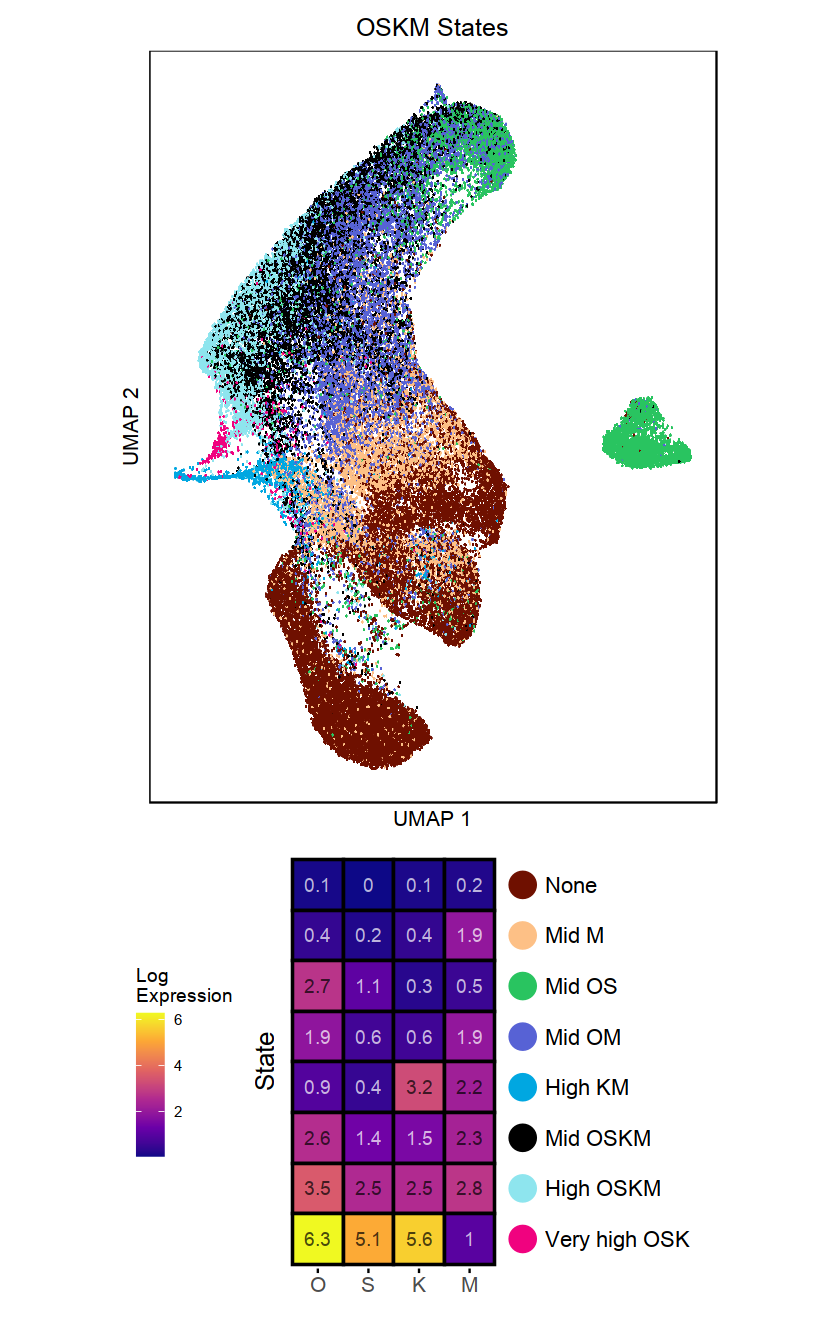

In [16]:
options(repr.plot.width = 7, repr.plot.height = 11)

# TODO: stoichiometry papers v high OSKM = non reprog?
# switching off of exogenous K at late stage

state_plot_coloured = state_plot + 
    scale_color_manual(values=COLORS) +
    theme(legend.position="none") 

combined_plot <- wrap_plots(state_plot_coloured,
          wrap_plots(plot_spacer(), legend_plot, plot_spacer(), widths=c(0.5,2,2)),
          heights=c(7,4))

combined_plot

In [19]:
ggsave(combined_plot, file=sprintf("./subfigs/%s_OSKM_states.pdf",
                                   format(Sys.Date(), "%Y%m%d")), 
       height=11, width=7, useDingbats=F)

In [95]:
# saveRDS(combined_plot, file=sprintf("./subfigs/%s_OSKM_states.rds",
#                                    format(Sys.Date(), "%Y%m%d")))

---

In [20]:
sessionInfo()

R version 3.6.3 (2020-02-29)
Platform: x86_64-conda_cos6-linux-gnu (64-bit)
Running under: Ubuntu 18.04.5 LTS

Matrix products: default
BLAS/LAPACK: /users/surag/anaconda3/envs/r36_cran/lib/libopenblasp-r0.3.9.so

locale:
 [1] LC_CTYPE=en_US.UTF-8       LC_NUMERIC=C              
 [3] LC_TIME=en_US.UTF-8        LC_COLLATE=en_US.UTF-8    
 [5] LC_MONETARY=en_US.UTF-8    LC_MESSAGES=en_US.UTF-8   
 [7] LC_PAPER=en_US.UTF-8       LC_NAME=C                 
 [9] LC_ADDRESS=C               LC_TELEPHONE=C            
[11] LC_MEASUREMENT=en_US.UTF-8 LC_IDENTIFICATION=C       

attached base packages:
[1] stats     graphics  grDevices utils     datasets  methods   base     

other attached packages:
[1] ClusterR_1.2.2  gtools_3.8.2    scattermore_0.7 patchwork_1.0.0
[5] reshape2_1.4.4  ggplot2_3.3.3   Seurat_3.1.5   

loaded via a namespace (and not attached):
 [1] nlme_3.1-147        tsne_0.1-3          RcppAnnoy_0.0.16   
 [4] RColorBrewer_1.1-2  httr_1.4.1          repr_1.1.0         
 [7] 